[-0.06724574 -0.0645689   0.02472566  0.11989038]
[[ 0.025093   -0.00463996 -0.00488375  0.00110996]
 [-0.00463996  0.0311204   0.00371446 -0.00450687]
 [-0.00488375  0.00371446  0.00204734 -0.00076406]
 [ 0.00110996 -0.00450687 -0.00076406  0.00076561]]
[-0.10148814  0.0108265   0.05739453  0.10207156]
[[-0.18921119  0.32050579  0.13103058  0.06471235]
 [-0.2784477  -0.46949212  0.04043423  0.17899262]
 [-0.11147159 -0.00517297  0.07118474  0.09469061]
 [ 0.23457327  0.03317419 -0.02168396  0.11055374]
 [-0.15321498  0.03901639  0.06642633  0.08727495]]


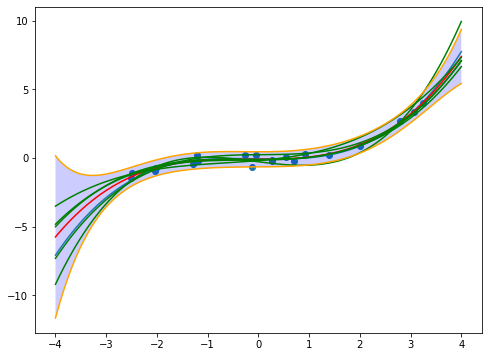

In [10]:
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt

dimension = 3
dataNum = 20
originalSigmaW2 = 0.01
minX = -4.0
maxX = 4.0
dataSigma2 = 0.25
sampleFunctionNum = 5
constSigma = 2.0

# Constants for learning
priorSigmaW2 = 1.0
sigmaY2 = dataSigma2

def getPhi(X, dimension):
    phi = [1]
    for i in range(dimension):
        phi.append(phi[-1] * X)
    
    return phi

def getPhiArray(X, dimension):
    phiArray = []
    
    for x in X:
        phiArray.append(getPhi(x, dimension))

    return phiArray
        
def polynominalFunc(X, dimension, weight):
    retValue = []
    
    for x in X:
        phi = getPhi(x, dimension)
        
        retValue.append(weight.dot(phi))
        
    return retValue
    
trainX = []
trainY = []

meanOfWeight = np.zeros(dimension + 1)
covOfWeight = originalSigmaW2 * np.eye(dimension + 1)
weightForTrainingData = np.random.multivariate_normal(meanOfWeight, covOfWeight)

print(weightForTrainingData)

originalFuncX = np.linspace( minX, maxX, 100)
originalFuncY = polynominalFunc(originalFuncX, dimension, np.array(weightForTrainingData))

trainX = (maxX - minX) * np.random.rand(dataNum) + minX
trainY = np.random.normal(polynominalFunc(trainX, dimension, np.array(weightForTrainingData)), dataSigma2)

phiArray = np.array(getPhiArray(trainX, dimension))

#print(phiArray.T.dot(phiArray))

# (3.72)
sigmaHat = np.linalg.inv((1/sigmaY2) * phiArray.T.dot(phiArray) + (1/priorSigmaW2) * np.eye(dimension + 1))
# (3.73)
muHat = (1/sigmaY2) * sigmaHat.dot(phiArray.T).dot(trainY.T)

print(sigmaHat)
print(muHat)

sampledWeights = np.random.multivariate_normal(muHat, sigmaHat, size = sampleFunctionNum)
print(sampledWeights)
sampledFunctionYs = []
for w in sampledWeights:
    sampledFunctionYs.append(polynominalFunc(originalFuncX, dimension, w))

# (3.76)
predictedY = polynominalFunc(originalFuncX, dimension, muHat)

# (3.77)
predictedSigma = []
for x in originalFuncX:
    phiX = np.array(getPhi(x, dimension))
    predictedSigma.append(sigmaY2 + phiX.dot(sigmaHat).dot(phiX.T))
upperPredictedY = predictedY + constSigma * np.array(predictedSigma)
lowerPredictedY = predictedY - constSigma * np.array(predictedSigma)

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
plt.plot(originalFuncX, originalFuncY)
plt.plot(originalFuncX, predictedY, color = "red")
for y in sampledFunctionYs:
    plt.plot(originalFuncX, y, color = "green")
plt.scatter(trainX, trainY)
plt.plot(originalFuncX, upperPredictedY, color = "orange")
plt.plot(originalFuncX, lowerPredictedY, color = "orange")
ax.fill_between(originalFuncX, upperPredictedY, lowerPredictedY, facecolor='blue', alpha=0.2)
plt.show()